# Assignment 5: Reinforcement learning <br/>
**DAT405 Introduction to Data Science and AI, 2021-2022, Study Period 1** <br/>
**Due Date:**  Oct 4, 23:59<br/>
**Authors:** Sidner Magnéli, Lukas Martinsson <br/>
**Hours:** way to many :) 

---


**What to submit**
*   **The entire assignment should be submitted through the notebook. No separate file will be accepted.** You can submit either the notebook itself, or a public link to a Google Colab notebook<br/>

*In the notebook:*
*	State your names and how many hours each person spent on the assignment.
*	The solutions and answers to the theoretical and practical problems, including LaTeX math-mode equations, plots and tables etc.
*	All plots/results should be visible such that the notebook does not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.<br/>

*Before submitting:*
*   Make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.

**Self-check**<br/>
Is all the required information included? Have you answered all questions to the best of your ability? Anything else you can easily check? (details, terminology, arguments, clearly stated answers etc.?) Does your notebook run and can reproduce the results, plots and tables?

**Grading**<br/>
Grading will be based on a qualitative assessment of each assignment. It is important to:
*	Present clear arguments
*	Present the results in a pedagogical way
*	Show understanding of the topics (e.g, write a pseudocode) 
*	Give correct solutions
*	Make sure that the code is well commented 

**Again, as mentioned in general guidelines, all code should be written here. And this same ipython notebook file (Assignment5_Reinforcement_Learning.ipynb) should be submitted with answers and code written in it. No separate file will be accepted.** 


## Primer


### Decision Making
The problem of **decision making under uncertainty** (commonly known as **reinforcement learning**) can be broken down into
two parts. First, how do we learn about the world? This involves both the
problem of modeling our initial uncertainty about the world, and that of drawing conclusions from evidence and our initial belief. Secondly, given what we
currently know about the world, how should we decide what to do, taking into
account future events and observations that may change our conclusions?
Typically, this will involve creating long-term plans covering possible future
eventualities. That is, when planning under uncertainty, we also need to take
into account what possible future knowledge could be generated when implementing our plans. Intuitively, executing plans which involve trying out new
things should give more information, but it is hard to tell whether this information will be beneficial. The choice between doing something which is already
known to produce good results and experiment with something new is known
as the **exploration-exploitation dilemma**.

### The exploration-exploitation trade-off

Consider the problem of selecting a restaurant to go to during a vacation. Lets say the
best restaurant you have found so far was **Les Epinards**. The food there is
usually to your taste and satisfactory. However, a well-known recommendations
website suggests that **King’s Arm** is really good! It is tempting to try it out. But
there is a risk involved. It may turn out to be much worse than **Les Epinards**,
in which case you will regret going there. On the other hand, it could also be
much better. What should you do?
It all depends on how much information you have about either restaurant,
and how many more days you’ll stay in town. If this is your last day, then it’s
probably a better idea to go to **Les Epinards**, unless you are expecting **King’s
Arm** to be significantly better. However, if you are going to stay there longer,
trying out **King’s Arm** is a good bet. If you are lucky, you will be getting much
better food for the remaining time, while otherwise you will have missed only
one good meal out of many, making the potential risk quite small.

## Overview


* To make things concrete, we will first focus on decision making under **no** uncertainity, i.e, given we have a world model, we can calculate the exact and optimal actions to take in it. We will first introduce **Markov Decision Process (MDP)** as the world model. Then we give one algorithm (out of many) to solve it.


* Next, we will work through one type of reinforcement learning algorithm called Q-learning. Q-learning is an algorithm for making decisions under uncertainity, where uncertainity is over the possible world model (here MDP). It will find the optimal policy for the **unknown** MDP, assuming we do infinite exploration.

## Markov Decision Process

Markov Decision Process (MDP) provides a mathematical framework for modeling sequential decision making under uncertainty. A MDP consists of five parts: the specific decision times, the state space of the environment/system, the available actions for the decision maker, the rewards, and the transition probabilities between the states.

* Decision epochs: $t={1,2,...,T}$, where $T\leq \infty$
* State space: $S=\{s_1,s_2,...,s_N\}$ of the underlying environment
* Action space $A=\{a_1,a_2,...,a_K\}$ available to the decision maker at each decision epoch
* Reward functions $R_t = r(a_t,s_t,s_{t+1})$ for the current state and action, and the resulting next state
* Transition probabilities $p(s'|s,a)$ that taking action $a$ in state $s$ will lead to state $s'$

At a given decision epoch $t$ and system state $s_t$, the decions maker, or *agent*, chooses an action $a_t$, the system jumps to a new state $s_{t+1}$ according to the transition probability $p(s_{t+1}|s_t,a_t)$, and the agent receives a reward $r_t(s_t,a_t,s_{t+1})$. This process is then repeated for a finite or infinite number of times.

A *decision policy* is a function $\pi: s \rightarrow a$, that gives instructions on what action to choose in each state. A policy can either be *deterministic*, meaning that the action is given for each state, or *randomized* meaning that there is a probability distribution over the set of possible actions. Given a specific policy $\pi$ we can then compute the the *expected total reward* when starting in a given state $s_1 \in S$, which is also known as the *value* for that state, 

$$V^\pi (s_1) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} s_1\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $a_t = \pi(s_t)$. To ensure convergence and to control how much credit to give to future rewards, it is common to introduce a *discount factor* $\gamma \in [0,1]$. For instance, if you think all future rewards should count equally, you would use $\gamma = 1$, while if you only care less about future rewards you would use $\gamma < 1$. The expected total *discounted* reward becomes

$$V^\pi( s_1) = \sum_{t=1}^T \gamma^{t-1} r(s_t,a_t, s_{t+1}) p(s_{t+1} | s_t, a_t) $$

Now, to find the *optimal* policy we want to find the policy $\pi^*$ that gives the highest total reward $V^{\pi^*}(s)$ for all $s\in S$. That is

$$V^{\pi^*}(s) \geq V^\pi(s), s\in S$$

The problem of finding the optimal policy is a _dynamic programming problem_. It turns out that a solution to the optimal policy problem in this context is the *Bellman equation*. The Bellman equation is given by

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

Thus, it can be shown that if $\pi$ is a policy such that $V^\pi$ fulfills the Bellman equation, then $\pi$ is an optimal policy.

A real world example would be an inventory control system. Your states would be the amount of items you have in stock. Your actions would be the amount to order. The discrete time would be the days of the month. The reward would be the profit.  

A major drawback of MDPs is called the "Curse of Dimensionality". MDPs unfortunately do not scale very well with increasing sets of states or actions.   


## Question 1

In this first question we work with the deterministic MDP, no code is necessary in this part.

Setup:

* The agent starts in state **S**
* The actions possible are **N** (north), **S** (south), **E** (east), and **W** west. 
* Note, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **F**, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box. 
* Assume no discount in this model: $\gamma = 1$

The reward of a state $r(s=(x, y))$ is given by the values on the grid:
    
| | | |
|----------|----------|---------|
|-1 |1|**F**|
|0|-1|1|  
|-1 |0|-1|  
|**S**|-1|1|

Let $(x,y)$ denote the position in the grid, such that $S=(0,0)$ and $F=(2,3)$.

### **1a)** What is the optimal path of the MDP above? Is it unique? Submit the path as a single string of directions. E.g. `NESW` will make a circle.

The optimal path is the one which maximizes the total rewards. One candidate for this might be the path going `EENNN`, with a final reward of zero. One could modify this path and still get the same total reward by instead going `EENNWNE`. In this case, one could argue the prior is more effective as it requires fewer steps to achieve the same final reward.

### **1b)** What is the optimal policy (i.e. the optimal action in each state)?


The list below shows the optimal actions of each state (matrix position) as follows `s`<sub>`i`</sub>` = (x,y)`. In the situation where multiple actions result in the same reward, the ones marked in bold marks the preferable action as these might lead to more value in the longer run.<br/> 

s<sub>1</sub> =  (0,0) ⇒ `N`, **`E`** <br/>
s<sub>2</sub> =  (1,0) ⇒ `E`<br/>
s<sub>3</sub> =  (2,0) ⇒ `W`, **`N`**<br/>
s<sub>4</sub> =  (0,1) ⇒ `N`, `E`<br/>
s<sub>5</sub> =  (1,1) ⇒ **`N`**, `S`, **`E`**, `W`<br/>
s<sub>6</sub> =  (2,1) ⇒ **`N`**, `S`<br/>
s<sub>7</sub> =  (0,2) ⇒ `N`, `E`<br/>
s<sub>8</sub> =  (1,2) ⇒ `N`, `E`<br/>
s<sub>9</sub> =  (2,2) ⇒ `N`<br/>
s<sub>10</sub> = (0,3) ⇒ `E`<br/>
s<sub>10</sub> = (1,3) ⇒ `E`<br/>
s<sub>12</sub> = (2,3) = Absorbing state ⇒ no action

### **1c)** What is expected total reward for the policy in 1b)?

The expected total reward for the policy above is given by calculating 

$$V^\pi (S) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} S\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $S$ is the starting point of the matrix. Hence, with this policy where the actions are not decided probabilistically meaning $p(s_{t+1} | a_t,s_t) = 1$, the above equation becomes

$$V^\pi (S) = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1})$$

which when expanded becomes

$$V^\pi (S) = r(s_1,E,s_2) + r(s_2,E,s_3) + r(s_3,N,s_6) + r(s_6,N,s_9) + r(s_9,N,s_12)$$
$$ = (-1) + 1 + (-1) + 1 + 0 = 0$$

## Value Iteration

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V^*$ in the right-hand side (RHS) of the Bellman equation should result in the same $V^*$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what actions that satisfy the equation. The process of repeated application of the Bellman equation what we here call the _value iteration_ algorithm.

The value iteration algorithm practically procedes as follows:

```
epsilon is a small value, threshold
for x from i to infinity 
do
    for each state s
    do
        V_k[s] = max_a Σ_s' p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
    end
    if  |V_k[s]-V_k-1[s]| < epsilon for all s
        for each state s,
        do
            π(s)=argmax_a ∑_s′ p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
            return π, V_k 
        end
end

```






**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards given in each state. Assume now that given a certain state $s$ and action $a$, there is a probability of 0.8 that that action will be performed and a probability of 0.2 that no action is taken. For instance, if we take action **E** in state $(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state, that is, we stay on the grid), and remain still 20 percent of the time. We will use a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$. 

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes the $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0$ was zero for all $s'$. The updated values for each state become

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2

### **2a)** Implement the value iteration algorithm just described here in python, and show the converging optimal value function and the optimal policy for the above 3x3 grid. Hint: use the pseudo-code above as a starting point, but be sure to explain what every line does.

In [1]:
# imports and global configuration
import numpy as np
from markov_decision_process import MDP

# check if graphviz is installed
try:
    from graphviz import Digraph
    has_graphviz = True
except ImportError:
    has_graphviz = False

Implementing a **Markov Decision Process** class to solve using the **Value Iteration algoritm**.

In [2]:
def plot_graph(mdp, graph_size="10,10", s_node_size="1,5", a_node_size="0,5", rankdir="LR",):
  """
  Function for pretty drawing MDP graph with graphviz library.
  Requirements:
  graphviz : https://www.graphviz.org/
  for ubuntu users: sudo apt-get install graphviz
  python library for graphviz
  for pip users: pip install graphviz
  :param mdp:
  :param graph_size: size of graph plot
  :param s_node_size: size of state nodes
  :param a_node_size: size of action nodes
  :param rankdir: order for drawing
  :return: dot object
  """
  s_node_attrs = {
      "shape": "doublecircle",
      "color": "#85ff75",
      "style": "filled",
      "width": str(s_node_size),
      "height": str(s_node_size),
      "fontname": "Arial",
      "fontsize": "24",
  }

  a_node_attrs = {
      "shape": "circle",
      "color": "lightpink",
      "style": "filled",
      "width": str(a_node_size),
      "height": str(a_node_size),
      "fontname": "Arial",
      "fontsize": "20",
  }

  s_a_edge_attrs = {"style": "bold", "color": "red", "ratio": "auto"}

  a_s_edge_attrs = {
      "style": "dashed",
      "color": "blue",
      "ratio": "auto",
      "fontname": "Arial",
      "fontsize": "16",
  }

  graph = Digraph(name="MDP")
  graph.attr(rankdir=rankdir, size=graph_size)
  for state_node in mdp._transition_probs:
    graph.node(str(state_node), **s_node_attrs)

    for posible_action in mdp.get_actions(state_node):
      action_node = state_node + "-" + posible_action
      graph.node(action_node, label=str(posible_action), **a_node_attrs)
      graph.edge(state_node, state_node + "-" + posible_action, **s_a_edge_attrs)

      for posible_next_state in mdp.get_next_states(state_node, posible_action):
        probability = mdp.get_transition_prob(
          state_node, posible_action, posible_next_state
        )
        reward = mdp.get_reward(state_node, posible_action, posible_next_state)

        if reward != 0:
          label_a_s_edge = (
              "p = " + str(probability) + "  " + "reward =" + str(reward)
          )
        else:
          label_a_s_edge = "p = " + str(probability)

        graph.edge(
          action_node,
          posible_next_state,
          label=label_a_s_edge,
          **a_s_edge_attrs
        )
  return graph


def plot_graph_with_state_values(mdp, state_values):
  """ Plot graph with state values"""
  graph = plot_graph(mdp)
  for state_node in mdp._transition_probs:
    value = state_values[state_node]
    graph.node(state_node, label=str(state_node) + "\n" + "V =" + str(value)[:4])
  return graph


def get_optimal_action_for_plot(mdp, state_values, state, get_action_value, gamma=0.9):
  """ Finds optimal action using formula above. """
  if mdp.is_terminal(state):
    return None
  next_actions = mdp.get_actions(state)
  q_values = [
    get_action_value(mdp, state_values, state, action, gamma)
    for action in next_actions
  ]
  optimal_action = next_actions[np.argmax(q_values)]
  return optimal_action


def plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value, gamma=0.9):
  """ Plot graph with state values and """
  graph = plot_graph(mdp)
  opt_s_a_edge_attrs = {
    "style": "bold",
    "color": "green",
    "ratio": "auto",
    "penwidth": "6",
  }

  for state_node in mdp._transition_probs:
    value = state_values[state_node]
    graph.node(state_node, label=str(state_node) + "\n" + "V =" + str(value)[:4])
    for action in mdp.get_actions(state_node):
      if action == get_optimal_action_for_plot(mdp, state_values, state_node, get_action_value, gamma):
        graph.edge(state_node, state_node + "-" + action, **opt_s_a_edge_attrs)
  return graph



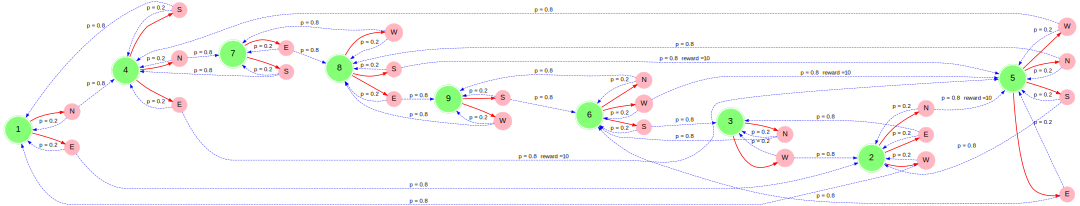

In [3]:
# define transition probabilities according to the description above.
transition_probs = {
  1: {
    "N": {4: 0.8, 1: 0.2}, 
    "E": {2: 0.8, 1: 0.2}
  },
  2: {
    "N": {5: 0.8, 2: 0.2}, 
    "E": {3: 0.8, 2: 0.2}, 
    "W": {1: 0.8, 2: 0.2}
  },
  3: {
    "N": {6: 0.8, 3: 0.2}, 
    "W": {2: 0.8, 3: 0.2}
  },
  4: {
    "N": {7: 0.8, 4: 0.2}, 
    "E": {5: 0.8, 4: 0.2}, 
    "S": {1: 0.8, 4: 0.2}
  },
  5: {
    "N": {8: 0.8, 5: 0.2},
    "E": {6: 0.8, 5: 0.2},
    "S": {2: 0.8, 5: 0.2},
    "W": {4: 0.8, 5: 0.2},
  },
  6: {
    "N": {9: 0.8, 6: 0.2}, 
    "S": {3: 0.8, 6: 0.2}, 
    "W": {5: 0.8, 6: 0.2}
  },
  7: {
    "E": {8: 0.8, 7: 0.2}, 
    "S": {4: 0.8, 7: 0.2}
  },
  8: {
    "E": {9: 0.8, 8: 0.2}, 
    "S": {5: 0.8, 8: 0.2}, 
    "W": {7: 0.8, 8: 0.2}
  },
  9: {
    "S": {6: 0.8, 9: 0.2}, 
    "W": {8: 0.8, 9: 0.2}
  }
}

# define reward function / mapping
rewards = {
  1: {
    "N": {4: 0, 1: 0}, 
    "E": {2: 0, 1: 0}
  },
  2: {
    "N": {5: 10, 2: 0}, 
    "E": {3: 0, 2: 0}, 
    "W": {1: 0, 2: 0}
  },
  3: {
    "N": {6: 0, 3: 0}, 
    "W": {2: 0, 3: 0}
  },
  4: {
    "N": {7: 0, 4: 0}, 
    "E": {5: 10, 4: 0}, 
    "S": {1: 0, 4: 0}
  },
  5: {
    "N": {8: 0, 5: 0}, 
    "E": {6: 0, 5: 0}, 
    "S": {2: 0, 5: 0}, 
    "W": {4: 0, 5: 0}
  },
  6: {
    "N": {9: 0, 6: 0}, 
    "S": {3: 0, 6: 0}, 
    "W": {5: 10, 6: 0}
  },
  7: {
    "E": {8: 0, 7: 0}, 
    "S": {4: 0, 7: 0}
  },
  8: {
    "E": {9: 0, 8: 0}, 
    "S": {5: 10, 8: 0}, 
    "W": {7: 0, 8: 0}
  },
  9: {
    "S": {6: 0, 9: 0}, 
    "W": {8: 0, 9: 0}
  }
}

mdp = MDP(transition_probs, rewards, initial_state=1)

from IPython.display import display
if has_graphviz:
    display(plot_graph(mdp, graph_size='15,30'))

In [18]:
def get_action_value(mdp, state_values, state, action, discount):
    """ Computes Q(s,a) as in formula above """
    Q = [mdp.get_transition_prob(state, action, s) * (mdp.get_reward(state, action, s) + discount * state_values[s]) for s in state_values]
    return sum(Q)

def get_new_state_value(mdp, state_values, state, discount):
    """ Computes next V(s) as in formula above. Please do not change state_values in process. """
    if mdp.is_absorption_state(state): return 0

    Q = [get_action_value(mdp, state_values, state, a, discount) for a in mdp.get_actions(state)]
    return max(Q)

def render(env, state_values):
  (rows, cols) = env.shape
  values = list(new_state_values.values())
  for idy, row in enumerate(env):
    for idx in range(0,cols):
      env[rows-(idy+1)][idx] = round(values[(idy*cols)+idx], 4)
  print(env, end='\n\n')

[[ 0.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]

iter 0:
[[0. 8. 0.]
 [8. 0. 8.]
 [0. 8. 0.]]

iter 1:
[[5.76 9.44 5.76]
 [9.44 5.76 9.44]
 [5.76 9.44 5.76]]

iter 2:
[[ 7.8336 13.8464  7.8336]
 [13.8464  7.8336 13.8464]
 [ 7.8336 13.8464  7.8336]]

iter 3:
[[11.3795 16.1325 11.3795]
 [16.1325 11.3795 16.1325]
 [11.3795 16.1325 11.3795]]

iter 4:
[[13.6637 19.0971 13.6637]
 [19.0971 13.6637 19.0971]
 [13.6637 19.0971 13.6637]]

iter 5:
[[16.2094 21.2754 16.2094]
 [21.2754 16.2094 21.2754]
 [16.2094 21.2754 16.2094]]

iter 6:
[[18.2359 23.5003 18.2359]
 [23.5003 18.2359 23.5003]
 [18.2359 23.5003 18.2359]]

iter 7:
[[20.2027 25.3599 20.2027]
 [25.3599 20.2027 25.3599]
 [20.2027 25.3599 20.2027]]

iter 8:
[[21.8956 27.1107 21.8956]
 [27.1107 21.8956 27.1107]
 [21.8956 27.1107 21.8956]]

iter 9:
[[23.4609 28.6448 23.4609]
 [28.6448 23.4609 28.6448]
 [23.4609 28.6448 23.4609]]

iter 10:
[[24.8472 30.0479 24.8472]
 [30.0479 24.8472 30.0479]
 [24.8472 30.0479 24.8472]]

iter 11:
[[26.107  31.2

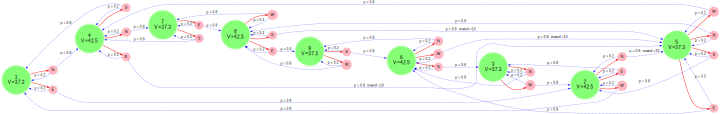


Final state values: {1: 37.3938584225763, 2: 42.588663617381485, 3: 37.3938584225763, 4: 42.588663617381485, 5: 37.3938584225763, 6: 42.588663617381485, 7: 37.3938584225763, 8: 42.588663617381485, 9: 37.3938584225763}


In [19]:
# parameters
discount = 0.9  # discount, as specified by the question
num_iter = 1000 # maximum iterations, excluding initialization
threshold = 0.001 # stop VI algorithm if new values are this close to old values (or closer)

# initialize output env
rows, cols = 3,3
env = np.zeros((rows, cols))
env[1][1] = 10
print(env, end='\n\n')

# initialize V(s)
state_values = {s : 0 for s in mdp.get_states()}

for i in range(num_iter):

  # Compute new state values using the functions defined above.
  new_state_values = { s: get_new_state_value(mdp, state_values, s, discount) 
    for s in mdp.get_states()
  }
  
  # Compute difference
  diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_states())

  print("iter %i:"%i)
  render(env, new_state_values)
  # print('   '.join("V(%s) = %.3f"%(s, v) for s,v in state_values.items()), end='\n\n')

  # update state values for next iteration
  state_values = new_state_values
  
  # stop VI algorithm once diff is below set threshold 
  if diff < threshold:
      print("Terminated"); break
        
if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))
    
print("\nFinal state values:", state_values)

### **2b)** Explain why the result of 2a) does not depend on the initial value $V_0$.

## Reinforcement Learning (RL)
Until now, we understood that knowing the MDP, specifically $p(s'|a,s)$ and $r(a,s,s')$ allows us to efficiently find the optimal policy using the value iteration algorithm. Reinforcement learning (RL) or decision making under uncertainity, however, arises from the question of making optimal decisions without knowing the true world model (the MDP in this case).

So far we have defined the value function for a policy through $V^\pi$. Let's now define the *action-value function*

$$Q^\pi(s,a) = \sum_{s'} p(s'|a,s) [r(a,s,s') + \gamma V^\pi(s')]$$

The value function and the action-value function are directly related through

$$V^\pi (s) = \max_a Q^\pi (s,a)$$

i.e, the value of taking action $a$ in state $s$ and then following the policy $\pi$ onwards. Similarly to the value function, the optimal $Q$-value equation is:

$$Q^*(s,a) = \sum_{s'} p(s'|a,s) [r(a,s
]\,s') + \gamma V^*(s')]$$

and the relationship between $Q^*(s,a)$ and $V^*(s)$ is simply

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$

## Q-learning

Q-learning is a RL-method where the agent learns about its unknown environment (i.e. the MDP is unknown) through exploration. In each time step *t* the agent chooses an action *a* based on the current state *s*, observes the reward *r* and the next state *s'*, and repeats the process in the new state. Q-learning is then a method that allows the agent to act optimally. Here we will focus on the simplest form of Q-learning algorithms, which can be applied when all states are known to the agent, and the state and action spaces are reasonably small. This simple algorithm uses a table of Q-values for each $(s,a)$ pair, which is then updated in each time step using the update rule in step $k+1$

$$Q_{k+1}(s,a) = Q_k(s,a) + \alpha \left( r(s,a) + \gamma \max \{Q_k(s',a')\} - Q_k(s,a) \right) $$ 

where $\gamma$ is the discount factor as before, and $\alpha$ is a pre-set learning rate. It can be shown that this algorithm converges to the optimal policy of the underlying MDP for certain values of $\alpha$ as long as there is sufficient exploration. While a constant $\alpha$ generally does not guarantee us to reach true convergence, we keep it constant at $\alpha=0.1$ for this assignment.

## OpenAI Gym

We shall use already available simulators for different environments (worlds) using the popular OpenAI Gym library. It just implements [different types of simulators](https://gym.openai.com/) including ATARI games. Although here we will only focus on simple ones, such as the [Chain enviroment](https://gym.openai.com/envs/NChain-v0/) illustrated below.
![alt text](https://chalmersuniversity.box.com/shared/static/6tthbzhpofq9gzlowhr3w8if0xvyxb2b.jpg)
The figure corresponds to an MDP with 5 states $S = \{1,2,3,4,5\}$ and two possible actions $A=\{a,b\}$ in each state. The arrows indicate the resulting transitions for each state-action pair, and the numbers correspond to the rewards for each transition.


## Question 3
You are to first familiarize with the framework using its [documentation](http://gym.openai.com/docs/), and then implement the Q-learning algorithm for the Chain enviroment (called 'NChain-v0') using default parameters. Finally print the $Q^*$ table at convergence. Convergence is **not** a constant value, rather a stable plateau with some noise. Take $\gamma=0.95$. You can refer to the Q-learning (frozen lake) Jupyter notebook shown in class, uploaded on Canvas. Hint: start with a small learning rate.


## Question 4

### **4a)** Define the MDP corresponding to the Chain environment above and verify that the optimal $Q^*$ value obtained using simple Q-learning is the same as the optimal value function $V^*$ for the corresponding MDP's optimal action. Hint: compare values obtained using value iteration and Q-learning.


### **4b)** What is the importance of exploration in RL? Explain with an example.

## Question 5

### **5a)** Give a summary of how a decision tree works and how it extends to random forests.


### **5b)** Explain what makes reinforcement learning different from supervised learning tasks such as regression or classification.


# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf